# <span style="color:blue"> 이토록 쉬운 통계 & R </span>

<img src="../image/cover.png" width="200" height="400" align="left">  임경덕 지음

## PART 4 데이터 분석 도구, R

## 95% R로 분석 다시보기-2-treat-4-선형대수기초 대응분석관련-14 (54일차)

   * 데이타프로젝트 (http://dataproject.xyz) 또는 (http://cafe.naver.com/dataartproject) 에 미리 저장된 스크립트를 다운 받을 수 있습니다.
   * 스크립트를 활용하면 직접 명령어를 입력하지 않고 저장된 명령어들을 실행할 수 있습니다.

### 데이터 파일은 dataartproject.xyz 에 있습니다.

# 두개의 범주형 변수의 관계 찾기 -- treat - 대응분석 정리

## 이번에는 G-Test 에 관해서 언급 할 예정입니다.
http://www.sthda.com/english/articles/31-principal-component-methods-in-r-practical-guide/120-correspondence-analysis-theory-and-practice/

이번에도 [전편](http://localhost:8888/notebooks/PART04/23-95%25%20R로%20분석%20다시보기-2-treat-4-선형대수기초-대응분석관련-13.ipynb) 에 계속 해서 진행 합니다.

전편에선 카이제곱 통계량에 대해서 정리 하였습니다. 이번엔 G-Test 에 대해서 정리 할 것입니다.

## 요구 패키지 들
FactorMineR : CA 계산 패키지
factoextra  : 결과를 출력 그래프로 표시

In [3]:
#install.packages("FactoMineR")
#install.packages("factoextra")

In [4]:
# 패키지 로드
library(FactoMineR)
library(factoextra)

Loading required package: ggplot2
Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


데모 데이터로 housetasks 를 사용합니다. 
* row 는 여러 집안일들을 나타내고
* column 은 누가 일을 한것인지 표시합니다. (아내, 남편, 공동, 위탁) 으로 구분합니다.
* 각 셀의 값은 빈도수를 나타냅니다.

In [5]:
# data 준비 housetasks 는 factoextra 에 포함된 데이터 입니다.
data(housetasks)

In [6]:
#head(housetasks) 교차표를 보면 다음과 같습니다.
housetasks

,Wife,Alternating,Husband,Jointly
Laundry,156,14,2,4
Main_meal,124,20,5,4
Dinner,77,11,7,13
Breakfeast,82,36,15,7
Tidying,53,11,1,57
Dishes,32,24,4,53
Shopping,33,23,9,55
Official,12,46,23,15
Driving,10,51,75,3
Finances,13,13,21,66


데이터 내용을 보면
* Main_Meal, 세탁, 저녁 등은 주부가 주로 담당합니다.
* 수리 는 남편이 주로 담당합니다.
* 휴일은 부부 공동 담당합니다.

G-Test 에 대해서 정리 합니다.

## G-Test : Likelihood ratio test

In [7]:
chisq <- chisq.test(housetasks)
chisq


	Pearson's Chi-squared test

data:  housetasks
X-squared = 1944.5, df = 36, p-value < 2.2e-16


다음에는  G-테스트를 잠깐 언급한 후 메인이 대응 분석을 할 예정입니다.

**G-test** 는 카이제곱 검정의 대안으로 교차표 상의 독립성 검정을 하는 테스트 입니다. 둘의 결과는 대체적으로 비숫하다고 합니다.  
테스트는 likelihood ratio 를 사용하여 합니다. likelihood ratio 는 다음과 같이 정의 합니다.  

$$
ratio = \dfrac{o}{e}
$$

* o: 관측값
* e: 예측값

likelihood ratio 또는 그것의 로그값 을 계산 p 값을 구한다. likelihood ratio 의 로그 값을 사용하면, log-likelihood ratio 통계량이라고 합니다.  

이런 테스트를 G-검정 (또는 우도 비 검정 또는 최대 우도 통계량 유의성 검정: maximum likelihood statistical significance test) 라고 합니다.  

G-검정은 일반적으로 다음과 같이 정의 합니다.
$$
G = 2 * \sum o \times log(\dfrac{o}{e})
$$

* o : 교차표 각 관측된 항목
* e : 교차표 각 예측된 항목
* log : 자연대수
* sum : 교차표 전체 합


G 분포는 카이제곱 분포의 근사입니다. 카이제곱 분포와 같은 자유도를 가집니다.
$$
df = (r - 1)(c - 1)
$$

* r : 교차표에서 가로변수 갯수 (row)
* c : 교차표에서 세로변수 갯수 (column)

카이제곱 분포와 비교해보면

$$
\chi^2 = \sum\dfrac{(o - e)^2}{e}
$$

R 에서 제공하는 함수는 likelihood.test() 또는 G.test() 가 있습니다. 여기선 G.test() 를 사용합니다.


In [8]:
# install.packages("RVAideMemoire")

In [9]:
library(RVAideMemoire)

In [10]:
gtest <- G.test(as.matrix(housetasks))
gtest

Warning message in G.test(as.matrix(housetasks)):
“G test should not be used with 0 values”


	G-test

data:  as.matrix(housetasks)
G = 1907.7, df = 36, p-value < 2.2e-16


### 가로변수 와 세로변수 연관 관계 해석

교차표에서 가로, 세로 변수를 해석하려면, likelihood ratio 를 지수로 해석한다.
$$
ratio = \dfrac{o}{e}
$$

각 셀에서
* ratio > 1 이면 가로 변수와 세로 변수는 강하게 끌림을 나타낸다.
* ratio < 1 이면 기로 변수와 세로 변수는 강하게 밀침을 나타낸다.


ratio 는 다음에서 얻는다

In [11]:
ratio <- chisq$observed/chisq$expected
round(ratio, 3)

,Wife,Alternating,Husband,Jointly
Laundry,2.576,0.546,0.052,0.078
Main_meal,2.356,0.898,0.150,0.090
Dinner,2.072,0.699,0.297,0.412
Breakfeast,1.702,1.766,0.490,0.171
Tidying,1.263,0.619,0.038,1.601
Dishes,0.823,1.458,0.162,1.607
Shopping,0.799,1.316,0.343,1.570
Official,0.363,3.290,1.097,0.535
Driving,0.209,2.519,2.470,0.074
Finances,0.334,0.790,0.851,2.001


In [12]:
library(corrplot)

corrplot 0.84 loaded


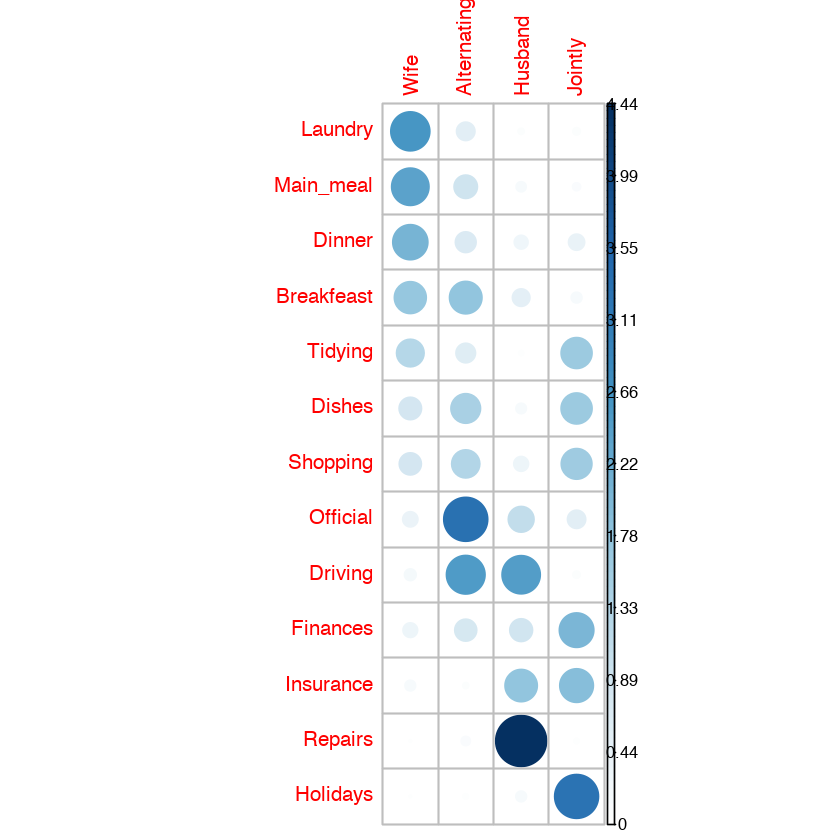

In [15]:
corrplot(ratio, is.corr = F)

이 그래프는 이전 관측결과를 확인해 줍니다. 즉
* 가로 변수 중 세탁, Main_meal, Dinner 는 주부 세로변수와 관계있다.
* 수리는 남편 세로변수와 관계 있다.
* 휴일은 공통 변수와 관계 있다.

로그 값을 보면
* ratio < 1 ==> log(ratio) < 0 붉은색
* ratio > 1 ==> log(ratio) > 0 푸른색

log(0) 을 피하기 위해 0.5 를 더한다.

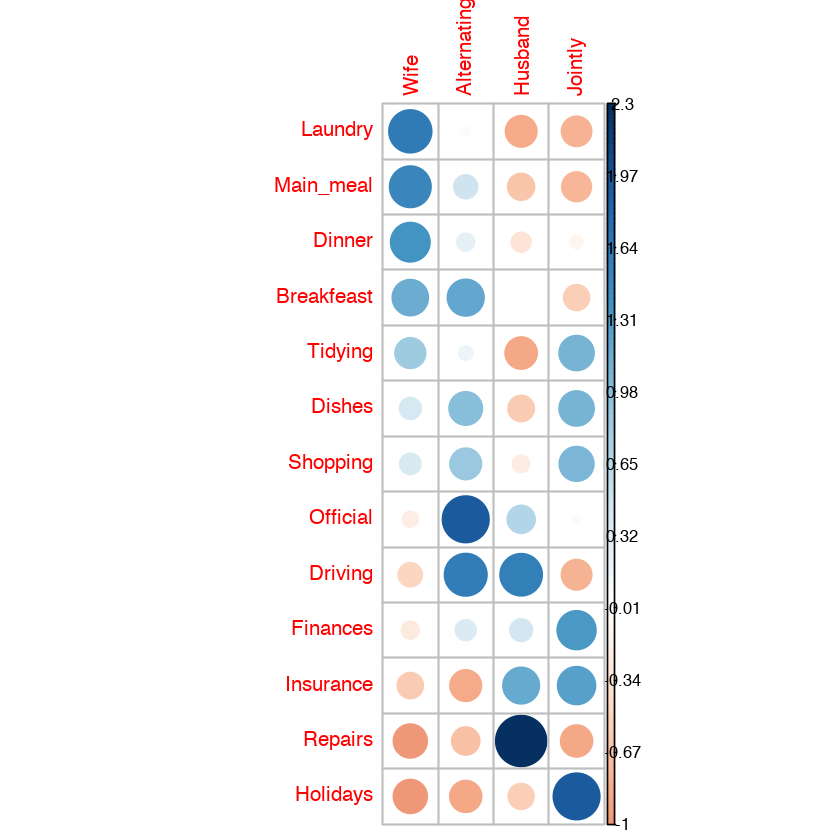

In [16]:
corrplot(log2(ratio + 0.5), is.corr = F)

이제 다음은 대응 분석을 실시 합니다.